<a href="https://colab.research.google.com/github/dinithprimal/DeepLearning_Tutorials/blob/main/Ex01_Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

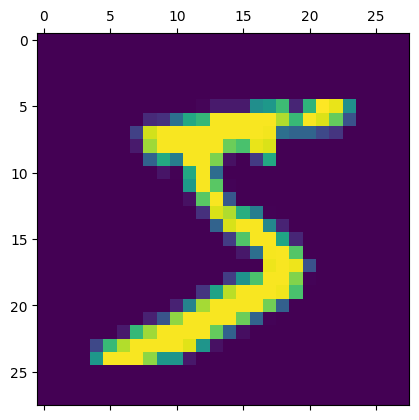

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train = X_train / 255
X_test = X_test / 255

In [18]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [19]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [21]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [22]:
model.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4684 - accuracy: 0.8776
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9156
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9209
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2667 - accuracy: 0.9262
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2617 - accuracy: 0.9268
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9282
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2554 - accuracy: 0.9292
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2533 - accuracy: 0.9297
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.250

In [23]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2693 - accuracy: 0.9282


[0.26930925250053406, 0.9282000064849854]

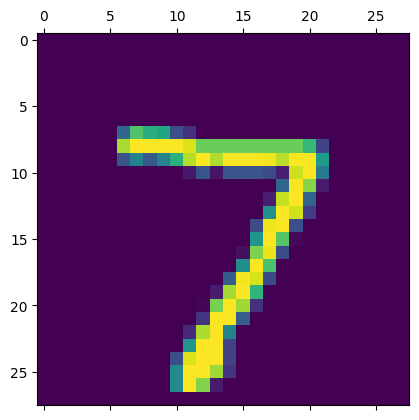

In [24]:
plt.matshow(X_test[0])

In [26]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [27]:
y_predicted[0]

array([2.0862790e-04, 2.5915742e-10, 1.7216975e-03, 9.6710300e-01,
       8.3415379e-04, 1.5311153e-01, 3.0184361e-10, 9.9987102e-01,
       5.9042204e-02, 5.7865334e-01], dtype=float32)

In [28]:
np.argmax(y_predicted[0])

7

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[0]

7

In [39]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    3,    2,    0,    7,    5,    3,    1,    0],
       [   0, 1109,    4,    2,    0,    1,    4,    2,   13,    0],
       [   5,    7,  931,   16,    7,    3,   11,   10,   38,    4],
       [   2,    0,   17,  917,    0,   30,    3,   10,   25,    6],
       [   1,    1,    7,    3,  910,    0,   10,    6,   13,   31],
       [   6,    2,    1,   30,    8,  793,   13,    7,   29,    3],
       [  11,    3,    7,    1,    7,   15,  911,    1,    2,    0],
       [   1,    5,   24,    6,    4,    1,    0,  956,    4,   27],
       [   7,    6,    5,   21,    8,   25,    7,   10,  876,    9],
       [  10,    7,    1,   10,   22,    7,    0,   23,    9,  920]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

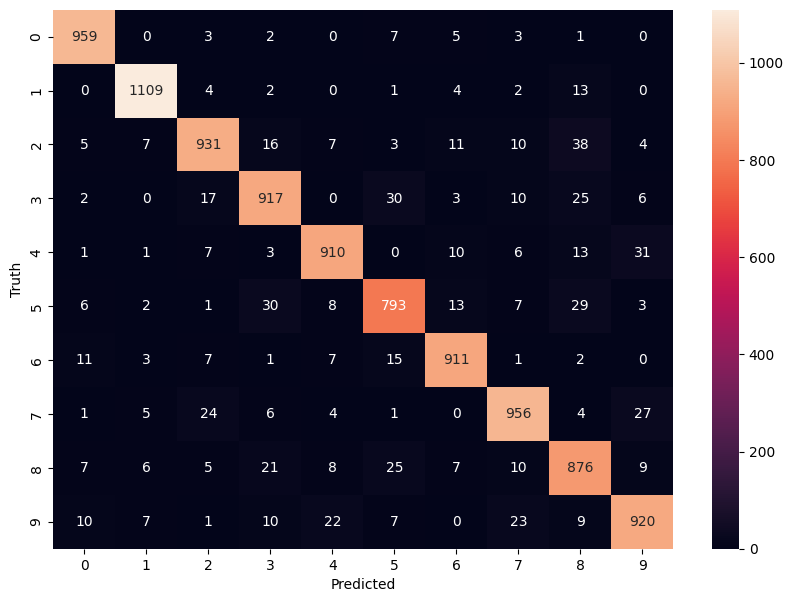

In [31]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding more hidden layers

In [32]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [33]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [34]:
model2.fit(X_train_flattened, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2755 - accuracy: 0.9229
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1244 - accuracy: 0.9639
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9744
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0664 - accuracy: 0.9802
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9840
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0405 - accuracy: 0.9875
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0334 - accuracy: 0.9898
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.9930
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [35]:
model2.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1016 - accuracy: 0.9797


[0.10156034678220749, 0.9797000288963318]

In [36]:
y_predicted2 = model2.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [37]:
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]

In [40]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels2)

Text(95.72222222222221, 0.5, 'Truth')

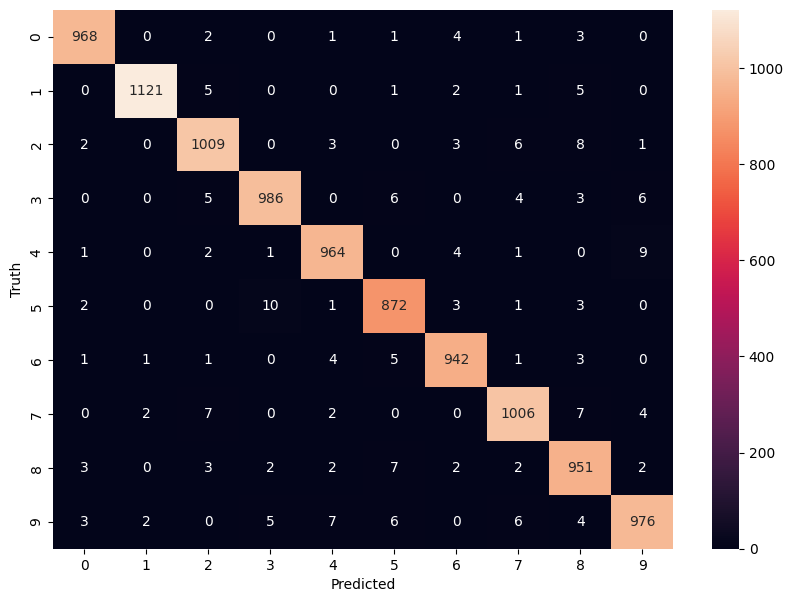

In [41]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Keras Flatten Funciton

In [42]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [43]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [44]:
model3.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2799 - accuracy: 0.9207
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1275 - accuracy: 0.9632
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0897 - accuracy: 0.9729
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0699 - accuracy: 0.9789
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0540 - accuracy: 0.9837
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0448 - accuracy: 0.9861
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9891
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0241 - accuracy: 0.9922
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

In [45]:
model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0970 - accuracy: 0.9795


[0.09704308211803436, 0.9794999957084656]

In [46]:
y_predicted3 = model3.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [47]:
y_predicted_labels3 = [np.argmax(i) for i in y_predicted3]

In [48]:
cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels3)

Text(95.72222222222221, 0.5, 'Truth')

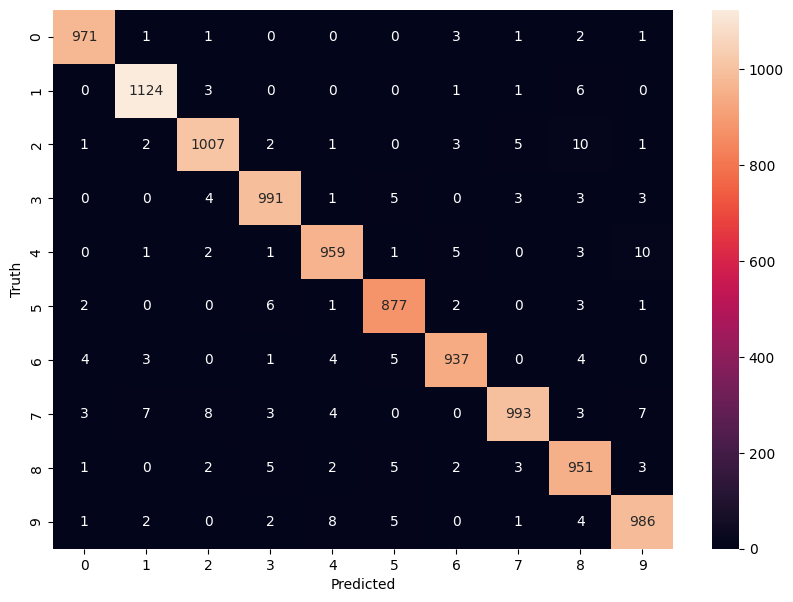

In [49]:
plt.figure(figsize = (10, 7))
sn.heatmap(cm3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')